# Busqueda por Profundidad
# Gustavo Guallpa

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [5]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [6]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


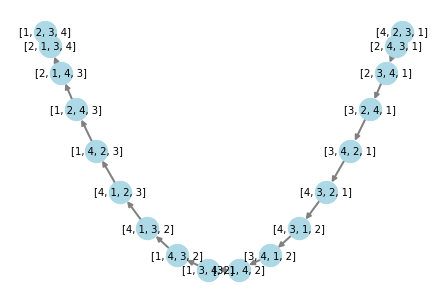

In [7]:
#**********DIBUJO DE LA SOLUCION**********#
#Importacion de la librerias necesarias
# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

#Creacion del archivo csv
import csv

#Para eliminar el archivo al final de la grafica
from os import remove


lista1 = []
lista1.append('origin')
lista1.append('destination')

def escribriDatos1():
    file = open("soluciones.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista1)
    file.close()
    
escribriDatos1()
    

#Metoddo para ecribir los datos en un archivo
def escribriDatos(lista):
    file = open("soluciones.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        escribriDatos(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
    
sol_lista = pd.read_csv("soluciones.csv")
DG=nx.DiGraph()
for row in sol_lista.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_spectral(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=10,
                 width=2, with_labels=True, node_size=500,
)

remove("soluciones.csv")
print(result)

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

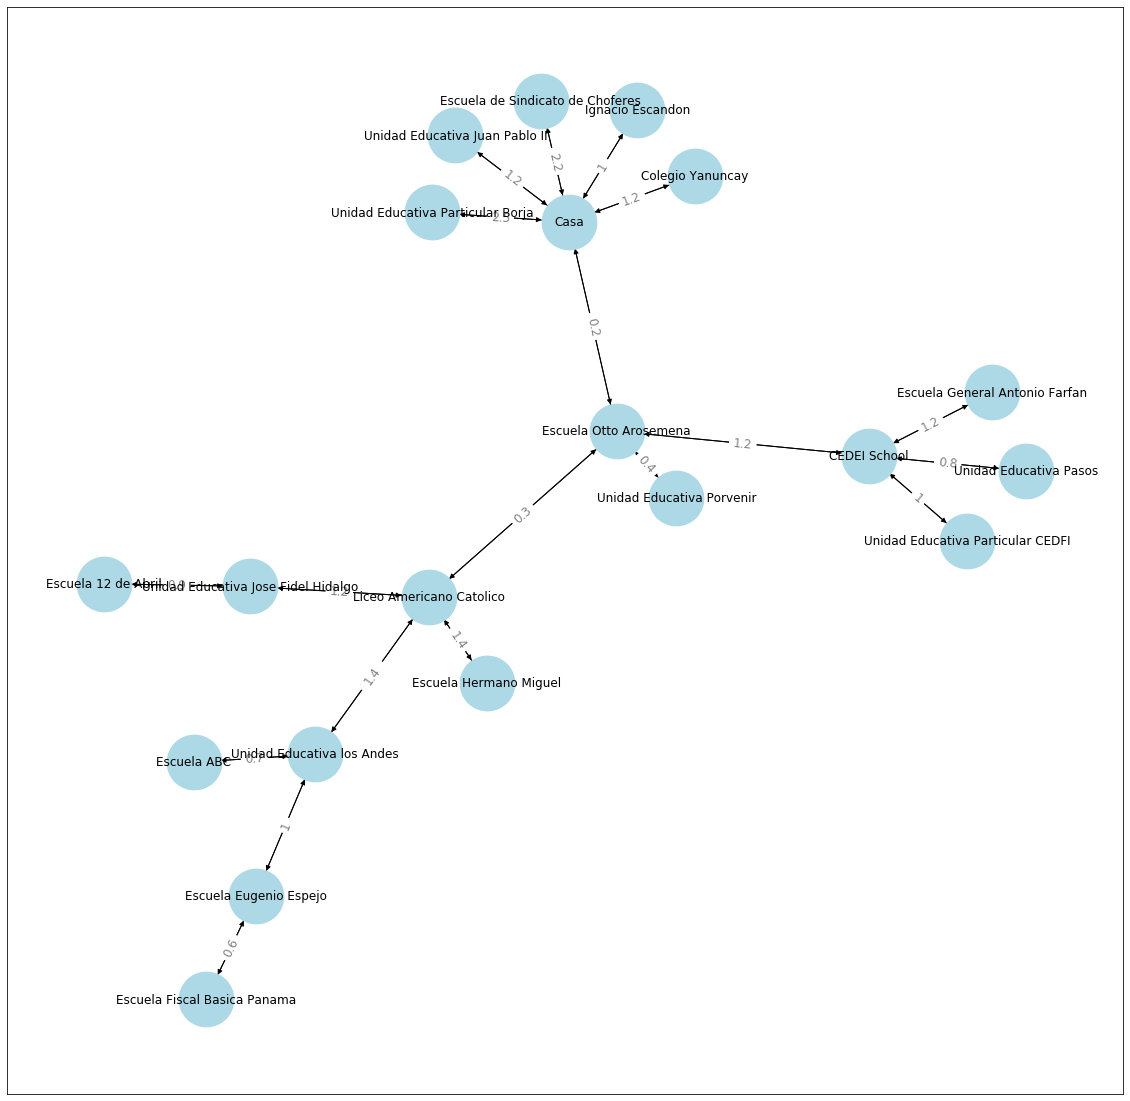

In [1]:
connectionsEscuelas = {
    'Casa': {'Unidad Educativa Particular Borja': 2.5, 'Escuela de Sindicato de Choferes': 2.2,'Unidad Educativa Juan Pablo II': 1.2, 'Colegio Yanuncay': 1.2, 'Ignacio Escandon': 1,'Escuela Otto Arosemena': 0.2},
    'Unidad Educativa Particular Borja': {'Casa': 2.5},
    'Escuela de Sindicato de Choferes': {'Casa': 2.2},
    'Unidad Educativa Juan Pablo II': {'Casa': 1.2},
    'Colegio Yanuncay': {'Casa': 1.2},
    'Ignacio Escandon': {'Casa': 1},

    'Escuela Otto Arosemena': {'Liceo Americano Catolico': 0.3,'Unidad Educativa Porvenir': 0.4,'CEDEI School': 1.2,'Casa': 0.2},

    'Liceo Americano Catolico': {'Escuela Hermano Miguel': 1.4, 'Unidad Educativa Jose Fidel Hidalgo': 1.2, 'Unidad Educativa los Andes': 1.16,'Escuela Otto Arosemena': 0.3},

    'Escuela Hermano Miguel': {'Liceo Americano Catolico': 1.4},

    'Unidad Educativa Jose Fidel Hidalgo': {'Escuela 12 de Abril': 0.9,'Liceo Americano Catolico': 1.2},
    'Escuela 12 de Abril': {'Unidad Educativa Jose Fidel Hidalgo': 0.9},

    'Unidad Educativa los Andes': {'Escuela ABC': 0.7, 'Escuela Eugenio Espejo': 1,'Liceo Americano Catolico': 1.4},
    'Escuela ABC': {'Unidad Educativa los Andes': 0.7},
    'Escuela Eugenio Espejo': {'Escuela Fiscal Basica Panama': 0.6,'Unidad Educativa los Andes': 1},
    'Escuela Fiscal Basica Panama': {'Escuela Eugenio Espejo': 0.6},

    'Unidad Educativa Porvenir': {'Escuela Otto Arosemena': 0.4},

    'CEDEI School': {'Unidad Educativa Particular CEDFI': 1,'Unidad Educativa Pasos': 0.8,'Escuela General Antonio Farfan': 1.2,'Escuela Otto Arosemena': 1.2},
    'Unidad Educativa Particular CEDFI': {'CEDEI School': 1},
    'Unidad Educativa Pasos': {'CEDEI School': 0.8},
    'Escuela General Antonio Farfan': {'CEDEI School': 1.2}
}
###Dibujo de la conexiones con cada uno de sus costos.
#Importamos las librerías a utilizar 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#Se crea una funcion para dibujar las conexiones.
def dibujarConexiones(lista):
    graf = nx.DiGraph()
    graf.add_nodes_from(lista)
    for valor, listaValor in lista.items():
        for a in listaValor:
            graf.add_edge(valor, a, size=250, length=str(listaValor[a]))

    pos = nx.spring_layout(graf)
    plt.figure(figsize=(20, 20))
    #Para que nos muestre cada uno de los costos de cada ruta
    labels = nx.get_edge_attributes(graf, 'length')
    nx.draw_networkx(graf, pos, node_color='lightblue', with_labels=True, node_size=3000)
    nx.draw_networkx_edge_labels(graf, pos, edge_labels=labels, font_color='gray', font_size=12)
    #Mostramos los resultados
    plt.show()

#Llamamos a nuestro método
dibujarConexiones(connectionsEscuelas)


Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.

In [8]:
import random

# Variable que indica el numero de reinas
n = 4 
#Almacenar las posiciones de las reinas
posSoluciones = []
#Almacenar la solucion en el tablero
solTablero = []

# Inicializar mi tabler con ceros.
for i in range(n):
    solTablero.append([0 for j in range(n)])


# Ubicar las reinas en el tablero
def posReinaTablero(i):
    #Esta es una condicion de salida
    if (i >= n):
        return 0
    #Cada una de la tuplas con la posicion de su respectiva columna
    f, c = (i, numAleatorio(posSoluciones, n)) 
    #Verificar si la posición es validad o no
    if (posValida((f, c))): 
        posSoluciones.append((f, c))
        posReinaTablero(i + 1) 
    #Si la poscicion no esta disponible se vuelve al nodo anterior 
    else: 
        #Sacamos la ultima tuplas que añadimos
        posSoluciones.pop()  
        posReinaTablero(i - 1)


# Validar la posicion en la que se ubica la reina
def posValida(posicion):
    f, c = posicion
    posValida = False
    if (len(posSoluciones) == 0):
        #Indicamos que la posicion inical esta disponible
        posValida = True  
    for i in range(len(posSoluciones)): 
        f_r, c_r = posSoluciones[i] 
        #Validar la posicion
        if (c_r != c and abs(f_r - f) != abs(c_r - c)):
            posValida = True  #
        else:
            posValida = False 
            break 
    #Retornamos el valor true para indicar que la poscion esta libre 
    return posValida 


#Generar las posciones para las columnas de las reinas
def numAleatorio(posSoluciones, n):
    if (len(posSoluciones) == 0): 
        return random.randint(0, n - 1)  
    c = posSoluciones[len(posSoluciones) - 1][1]
    arr = [c - 1, c, c + 1]
    #Verificar si en el arreglo hay mas de dos reinas
    if (len(posSoluciones) > 1):
        for i in range(len(posSoluciones) - 1):  
            c = posSoluciones[i][1]  
            arr.append(c)
    print(posSoluciones, arr, n)
    #Verificar si se genero un numero aleatorio unico
    aleatorio = True 
    aux = 0 
    #Mientras el aleatorio sea unico
    while (aleatorio):  
        alt = random.randint(0, n - 1) 
        cont = 0  # Contador
        # Para recorrer la reinas ya ubicadas
        for i in range(len(arr)):

            if (arr[i] != alt): 
                cont += 1
            if (arr[i] == alt):
                aux += 1  
        if (cont >= len(arr)):
            #Para poder detener nuestro bucle
            aleatorio = False 
            return alt  
        # Verificamos si hay posiciones disponibles
        if (aux >= len(arr)):
            aleatorio = False
            #En el caso de que no haya
            return 0 

#Llamamos a nuestro metodo.
posReinaTablero(0)  
#Bucle para añadir la posible soluciones
for i in range(len(posSoluciones)): 
    solTablero[posSoluciones[i][0]][posSoluciones[i][1]] = 1 

#Metodo para imprimir la solucion
print("LA SOLUCIÓN ES LA SIGUIENTE:")
for i in range(len(solTablero)): 
    print(solTablero[i])

[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0), (1, 3), (2, 1)] [0, 1, 2, 0, 3] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0), (1, 3), (2, 1)] [0, 1, 2, 0, 3] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0), (1, 3), (2, 1)] [0, 1, 2, 0, 3] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0), (1, 3), (2, 1)] [0, 1, 2, 0, 3] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 2)] [1, 2, 3, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0), (1, 3), (2, 1)] [0, 1, 2, 0, 3] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0), (1, 3), (2, 1)] [0, 1, 2, 0, 3] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0), (1, 3), (2, 1)] [0, 1, 2, 0, 3] 4
[(0, 0), (1, 3)] [2, 3, 4, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 2)] [1, 2, 3, 0] 4
[(0, 0)] [-1, 0, 1] 4
[(0, 0), (1, 3)] [2, 

Subir el cuaderno con la resolucion.

# Conclusiones

El método de busqueda por profundidad coje un nodo y desde alli se expande sus hijos, si no existe hace un retroceso , es un tipo de busqueda muy profunda , lo que se puede apreciar que no se puede garantizar que la solucion encotradada sea la optima.